# Лабораторная работа №3
Для динамической системы $ \displaystyle \dot{x} = y-ax, \ \dot{y}=-by +\frac{x}{1+x}$ провести классификацию стационарных точек, построить поля направлений, фазовые портреты. Указать значения параметров, при которых в систему происходят бифуркации.

$
\begin{cases}
    \dot{x} = y-ax \\
    \dot{y} = -by+\displaystyle\frac{x}{1+x}
\end{cases}
$

Чтобы найти стационарные точки, занулим производные по времени.

$\displaystyle
\begin{cases}
    y-ax = 0\\
    -by+\displaystyle\frac{x}{1+x} = 0 \\
\end{cases}
$

При $a = 0$ имеем одну точку $(0,0)$

При $b = 0$ также имеем только $(0,0)$

Предположим $a,b \neq 0$

Подставив выражение для $y$ получим уравнение:

$ x(-ab(1+x) + 1) =0$

$ x=0, \ x = \displaystyle \frac{1}{ab}-1$

Имеем 2 точки: $(0,0)$ и $\Big(\displaystyle \frac{1}{ab}-1, \displaystyle \frac{1}{b}-a\Big)$

Рассмотрим точку $(0,0)$

$\displaystyle J\Big|_{(0,0)} = 
\begin{pmatrix}
    -a & 1 \\
    1 & -b \\
\end{pmatrix}
$

Собственные значения матрицы:

$\displaystyle
\lambda_{1,2} = \frac{1}{2}(-(a+b) \pm \sqrt{(a-b)^2 + 4})
$

Зафиксируем $a=1$ и будем варьировать $b$, тогда

$\displaystyle
\lambda_{1,2} = \frac{1}{2}(-(1+b) \pm \sqrt{(1-b)^2 + 4})
$

При $b < 1$ собственные значения действительны и имеют разный знак, следовательно стационарная точка $(0,0)$ - седло.

При $b > 1$ собственные значения действительны и отрицательны, следовательно стационарная точка $(0,0)$ - устойчивый узел.

Теперь рассмотрим точку $\Big(\displaystyle \frac{1}{ab}-1, \displaystyle \frac{1}{b}-a\Big)$

Давайте для краткости обзовем ее $(x_1, y_1)$

$\displaystyle J\Big|_{(\frac{1}{ab}-1, \frac{1}{b}-a)} = 
\begin{pmatrix}
    -a & 1 \\
    (ab)^2 & -b \\
\end{pmatrix}
$

Собственные значения матрицы:

$\displaystyle
\lambda_{1,2} = \frac{1}{2}(-(a+b) \pm \sqrt{(a-b)^2 + 4a^2b^2})
$

Снова зафиксируем $a=1$ и будем варьировать $b$, тогда

$\displaystyle
\lambda_{1,2} = \frac{1}{2}(-(1+b) \pm \sqrt{(1-b)^2 + 4b^2})
$

При $b < 0$ собственные значения действительны и имеют разный знак, следовательно стационарная точка $(x_1, y_1)$ - седло.

При $0 < b < 1$ собственные значения действительны и отрицательны, следовательно стационарная точка $(x_1, y_1)$ - устойчивый узел.

При $1 < b$ собственные значения действительны и имеют разный знак, следовательно стационарная точка $(x_1, y_1)$ - седло.

In [39]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import phaseportrait
import warnings
warnings.filterwarnings("ignore")

In [28]:
def f1(x, y, a, b):
    return y - a*x

def f2(x, y, a, b):
    return -b*y + x/(1+x)

 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.5669241453554D+17   r2 =  0.5279857182993D+08
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.1660196033975D+20   r2 =  0.1546167688742D+11
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.1660196033975D+20   r2 =  0.1546167688742D+11
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.1660196033975D+20   r2 =  0.1546167688742D+11
 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      

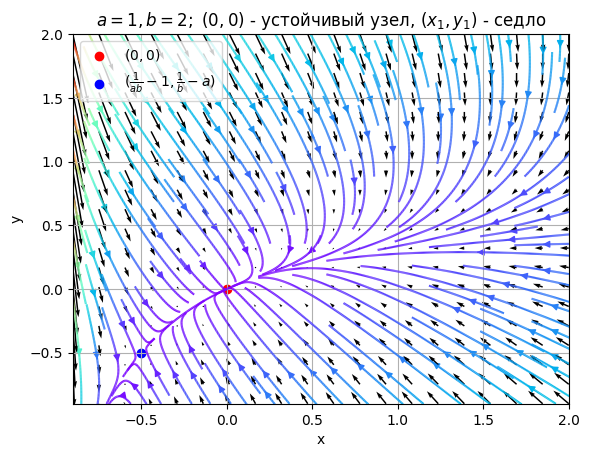

In [55]:
start = -0.9
end = 2
x = np.linspace(start, end, 20)
y = np.linspace(start, end, 20)
X, Y = np.meshgrid(x, y)
a, b = 1, 2
def f(x, y):
    return [y-a*x, -b*y + x/(1+x)]
dx = f1(X, Y, a, b)
dy = f2(X, Y, a, b)
point2 = [1/(a*b) - 1, 1/b-a]

portrait = phaseportrait.PhasePortrait2D(f, [start, end])
portrait.plot()
plt.scatter(0, 0, color='red', label='$(0,0)$')
plt.scatter(point2[0], point2[1], color='blue', label='$(\\frac{1}{ab}-1, \\frac{1}{b}-a)$')
plt.quiver(X, Y, dx, dy)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'$a={a}, b={b}; \ (0,0)$ - устойчивый узел, $(x_1, y_1)$ - седло')
plt.legend()

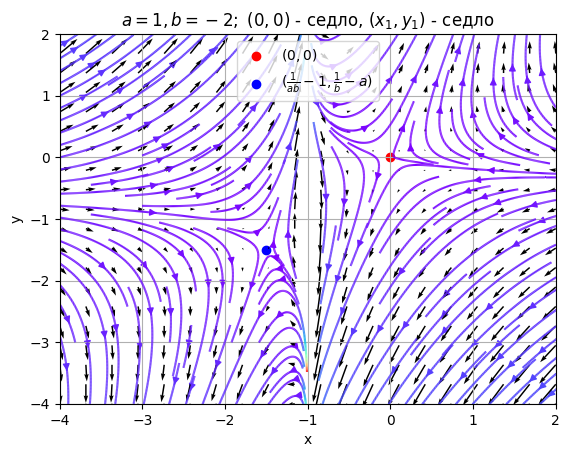

In [56]:
start = -4
end = 2
x = np.linspace(start, end, 20)
y = np.linspace(start, end, 20)
X, Y = np.meshgrid(x, y)
a, b = 1, -2
def f(x, y):
    return [y-a*x, -b*y + x/(1+x)]
dx = f1(X, Y, a, b)
dy = f2(X, Y, a, b)
point2 = [1/(a*b) - 1, 1/b-a]

portrait = phaseportrait.PhasePortrait2D(f, [start, end])
portrait.plot()
plt.scatter(0, 0, color='red', label='$(0,0)$')
plt.scatter(point2[0], point2[1], color='blue', label='$(\\frac{1}{ab}-1, \\frac{1}{b}-a)$')
plt.quiver(X, Y, dx, dy)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'$a={a}, b={b}; \ (0,0)$ - седло, $(x_1, y_1)$ - седло')
plt.legend()

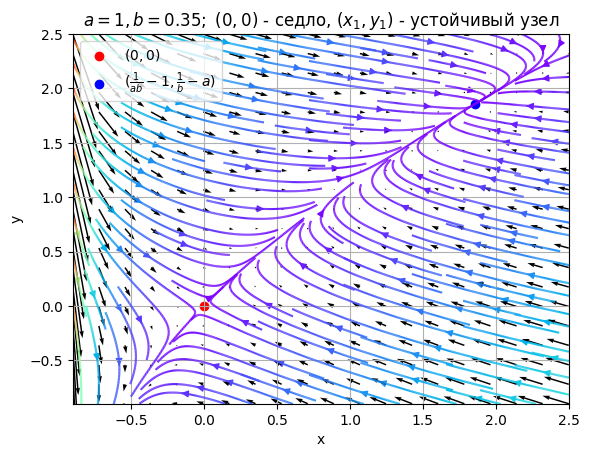

In [60]:
start = -0.9
end = 2.5
x = np.linspace(start, end, 20)
y = np.linspace(start, end, 20)
X, Y = np.meshgrid(x, y)
a, b = 1, 0.35
def f(x, y):
    return [y-a*x, -b*y + x/(1+x)]
dx = f1(X, Y, a, b)
dy = f2(X, Y, a, b)
point2 = [1/(a*b) - 1, 1/b-a]

portrait = phaseportrait.PhasePortrait2D(f, [start, end])
portrait.plot()
plt.scatter(0, 0, color='red', label='$(0,0)$')
plt.scatter(point2[0], point2[1], color='blue', label='$(\\frac{1}{ab}-1, \\frac{1}{b}-a)$')
plt.quiver(X, Y, dx, dy)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'$a={a}, b={b}; \ (0,0)$ - седло, $(x_1, y_1)$ - устойчивый узел')
plt.legend()